cuda:0
checkpoint directory created: ./model
saving model version 0.0
torch.Size([1000, 3]) torch.Size([1000, 1])


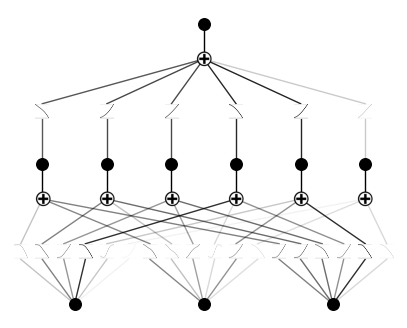

In [1]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[3,6,1], grid=3, k=3, seed=42, device=device)


from kan.utils import create_dataset
import matplotlib.pyplot as plt 
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2 + x[:,[2]])
dataset = create_dataset(f, n_var=3, device=device)
print(dataset['train_input'].shape, dataset['train_label'].shape)

# plot KAN at initialization
model(dataset['train_input'])
model.plot()

| train_loss: 3.49e-02 | test_loss: 3.83e-02 | reg: 8.05e+00 | : 100%|█| 50/50 [00:33<00:00,  1.48it


saving model version 0.1


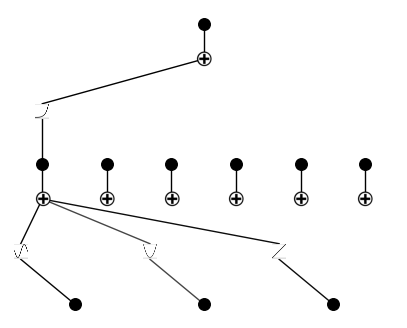

In [2]:
# train the model
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001)
model.plot()

saving model version 0.2


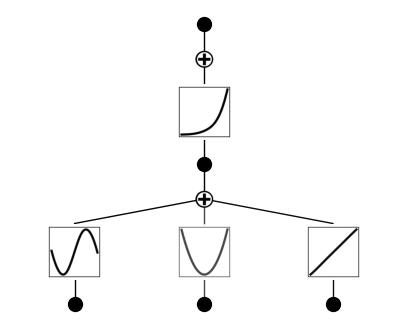

In [26]:
model = model.prune()
model.plot()

In [27]:
# continue training and replot
model.fit(dataset, opt="LBFGS", steps=50)

| train_loss: 2.45e-02 | test_loss: 2.56e-02 | reg: 1.56e+01 | : 100%|█| 50/50 [00:18<00:00,  2.74it

saving model version 0.3


{'train_loss': [array(0.03610542),
  array(0.03392149),
  array(0.03055753),
  array(0.03018162),
  array(0.02969943),
  array(0.03268674),
  array(0.02965498),
  array(0.02848934),
  array(0.02781277),
  array(0.02635044),
  array(0.02928113),
  array(0.02656497),
  array(0.02588835),
  array(0.02564791),
  array(0.02546299),
  array(0.03265684),
  array(0.03153964),
  array(0.0297183),
  array(0.0288985),
  array(0.02799588),
  array(0.03327423),
  array(0.03066718),
  array(0.02805773),
  array(0.02710168),
  array(0.02646037),
  array(0.03219029),
  array(0.0275042),
  array(0.02602619),
  array(0.02538158),
  array(0.02490228),
  array(0.03232442),
  array(0.02936735),
  array(0.02637497),
  array(0.02543797),
  array(0.02493182),
  array(0.03154041),
  array(0.02771198),
  array(0.02629718),
  array(0.02591522),
  array(0.02545718),
  array(0.02997238),
  array(0.02634427),
  array(0.02531183),
  array(0.0246888),
  array(0.02461164),
  array(0.03116999),
  array(0.02608613),
  a

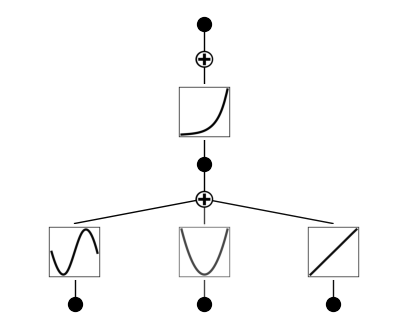

In [28]:
model.plot()

In [29]:
model = model.refine(10)

saving model version 0.4


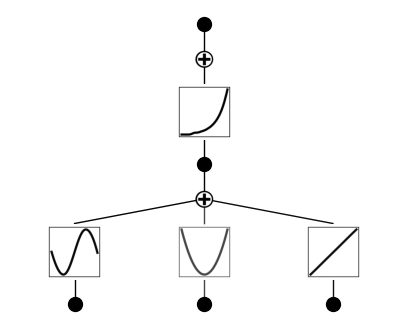

In [30]:
model.plot()

| train_loss: 1.92e-03 | test_loss: 2.60e-03 | reg: 1.74e+01 | : 100%|█| 50/50 [00:17<00:00,  2.86it


saving model version 0.5


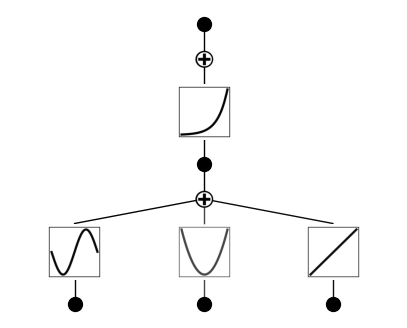

In [31]:
model.fit(dataset, opt="LBFGS", steps=50)
model.plot()

fixing (0,0,0) with sin, r2=0.9999989038499991, c=2
fixing (0,1,0) with x^2, r2=0.9999995498904414, c=2
fixing (0,2,0) with x, r2=0.9999997212345437, c=1
fixing (1,0,0) with exp, r2=0.999998940937913, c=2
saving model version 0.6


| train_loss: 3.18e-09 | test_loss: 3.50e-09 | reg: 0.00e+00 | : 100%|█| 50/50 [00:07<00:00,  6.83it


saving model version 0.7


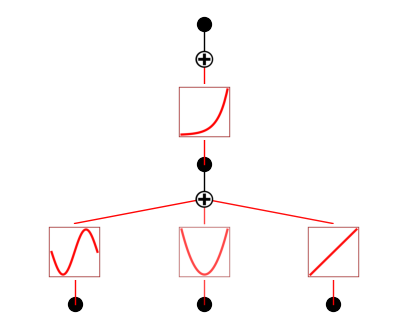

In [32]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

model.fit(dataset, opt="LBFGS", steps=50)
model.plot()

In [33]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(1.0*x_2**2 + 1.0*x_3 + 1.0*sin(3.1416*x_1))